In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import sys
import os
from scipy import stats
from PIL import Image
import ipywidgets as widgets
from IPython.display import display, clear_output
%matplotlib inline

In [2]:
answers = pd.read_excel('Do analizy czynnikowej esencjalizm.xlsx')
answers.index = answers.loc[:,'Unikalny identyfikator Data+Czas']
answers = answers.drop(columns=['Unikalny identyfikator Data+Czas','date','time'])
pandas_profiling.ProfileReport(answers)

Number of variables,32
Number of observations,248
Total Missing (%),0.0%
Total size in memory,62.1 KiB
Average record size in memory,256.3 B
Numeric,31
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [3]:
def transform(answers):
    result = answers.loc[:,['Wiek', 'Płeć', 'id_response']]
    
    for i in range(3,31,4):
        nazwa = answers.columns[i][:-2]
        
        wartosc = answers.iloc[:,i:(i+4)].mean(axis=1)
        rozstep = answers.iloc[:,i:(i+4)].max(axis=1)-answers.iloc[:,i:(i+4)].min(axis=1)
        
        result[nazwa+' wartosc'] = wartosc
        result[nazwa+' rozstep'] = rozstep
        
    return result
answers_transformed = transform(answers)
pandas_profiling.ProfileReport(answers_transformed)

Number of variables,18
Number of observations,248
Total Missing (%),0.0%
Total size in memory,35.0 KiB
Average record size in memory,144.3 B
Numeric,17
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [4]:
image1 = Image.open('ZDJECIA-AKTOROW.zip (Unzipped Files)/ZDJECIA-AKTOROW/a01.jpg')
filenames = os.listdir('ZDJECIA-AKTOROW.zip (Unzipped Files)/ZDJECIA-AKTOROW/')
loaded_images = dict(zip(filenames, map(lambda image : Image.open(f'ZDJECIA-AKTOROW.zip (Unzipped Files)/ZDJECIA-AKTOROW/{image}'), filenames)))

In [5]:
results = pd.read_excel('Wyniki_CNK_Analiza.xlsx')
emocje = results.loc[np.isnan(results.Zaufanie_NumerFoto)]
emocje.drop(['data','czas','Zaufanie_NumerFoto','face_filename2_ZAUFANIE','correct'],axis=1,inplace=True)
emocje.reset_index(drop=True, inplace=True)
zaufanie = results.loc[np.logical_not(np.isnan(results.Zaufanie_NumerFoto))]
zaufanie.drop(['data','czas','face_category_and_gender', 'Emocje_NumerFoto' ,'face_filename1_EMOCJE','correct'],axis=1, inplace=True)
zaufanie.reset_index(drop=True,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [6]:
pandas_profiling.ProfileReport(emocje)

Number of variables,12
Number of observations,8820
Total Missing (%),0.0%
Total size in memory,827.0 KiB
Average record size in memory,96.0 B
Numeric,9
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [7]:
pandas_profiling.ProfileReport(zaufanie)

Number of variables,11
Number of observations,8820
Total Missing (%),0.0%
Total size in memory,758.0 KiB
Average record size in memory,88.0 B
Numeric,9
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [8]:
def plot_factor_grouped_by_gender(factor_name):
    plt.figure(figsize=(16,9))
    x = np.linspace(-4,4,1000)
    y1 = stats.gaussian_kde(zaufanie.loc[zaufanie.plec==1,['ID',factor_name]].drop_duplicates().loc[:,factor_name])
    y2 = stats.gaussian_kde(zaufanie.loc[zaufanie.plec==0,['ID',factor_name]].drop_duplicates().loc[:,factor_name])
    plt.plot(x,y1(x),alpha=0.5)
    plt.plot(x,y2(x),alpha=0.5)
    plt.legend([1,0])
    plt.title(f'Rozkład {factor_name} wg. płci\n', size = 30)
    plt.show()

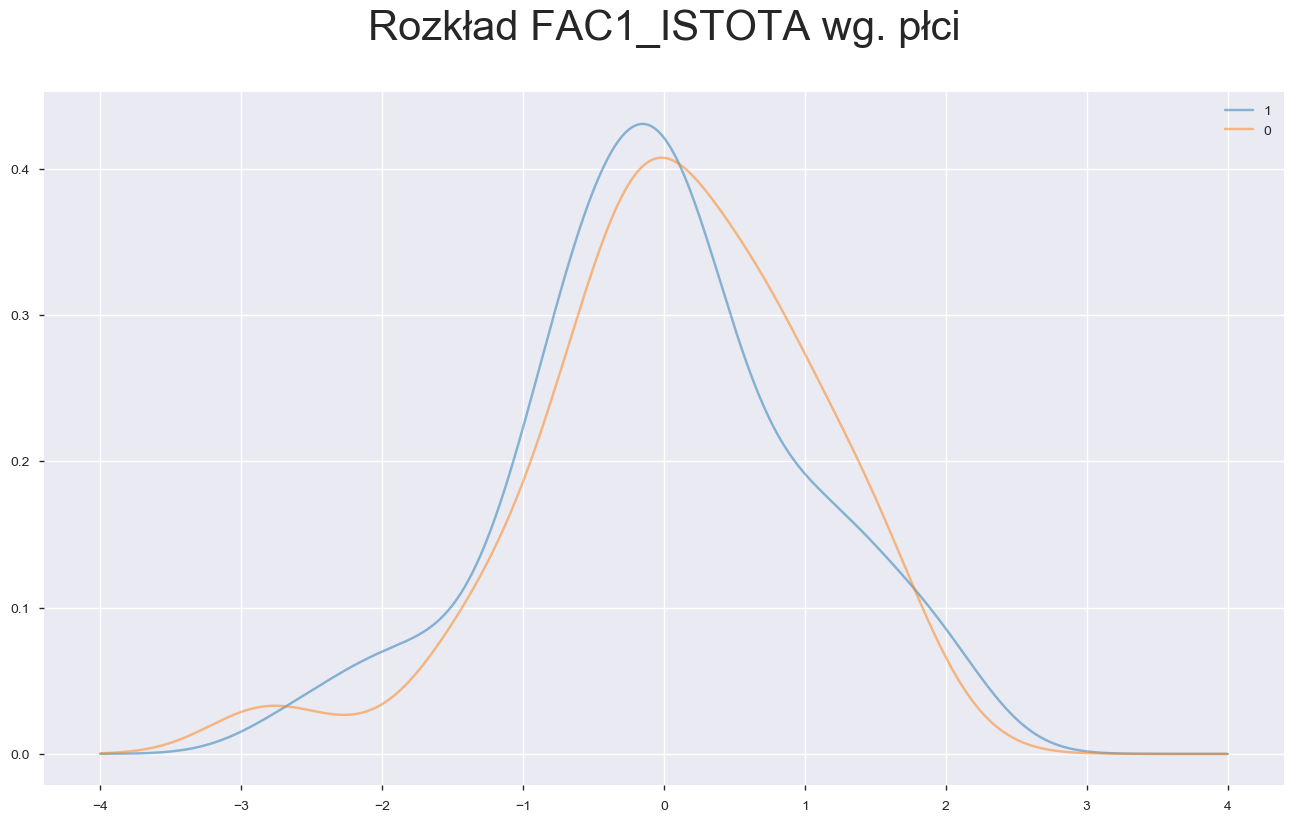

In [9]:
plot_factor_grouped_by_gender('FAC1_ISTOTA')

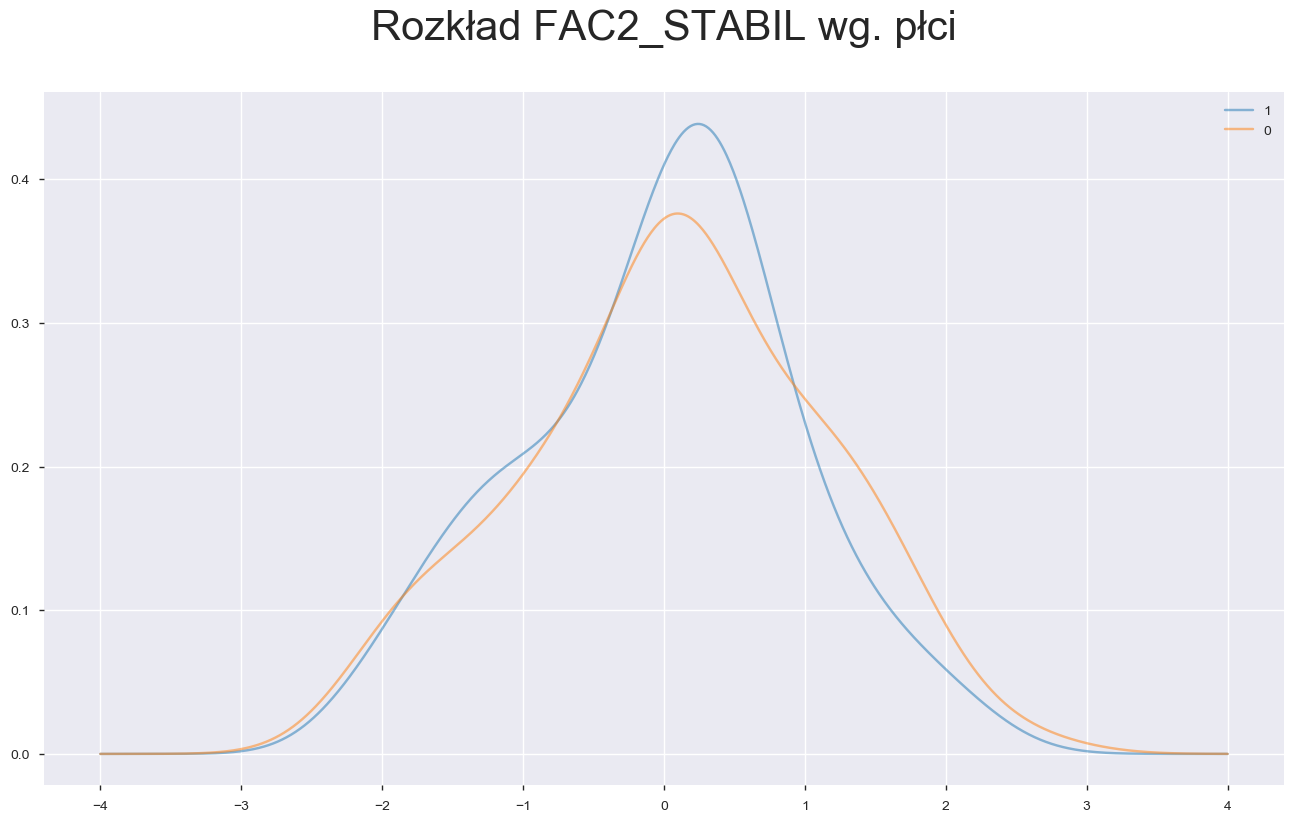

In [10]:
plot_factor_grouped_by_gender('FAC2_STABIL')

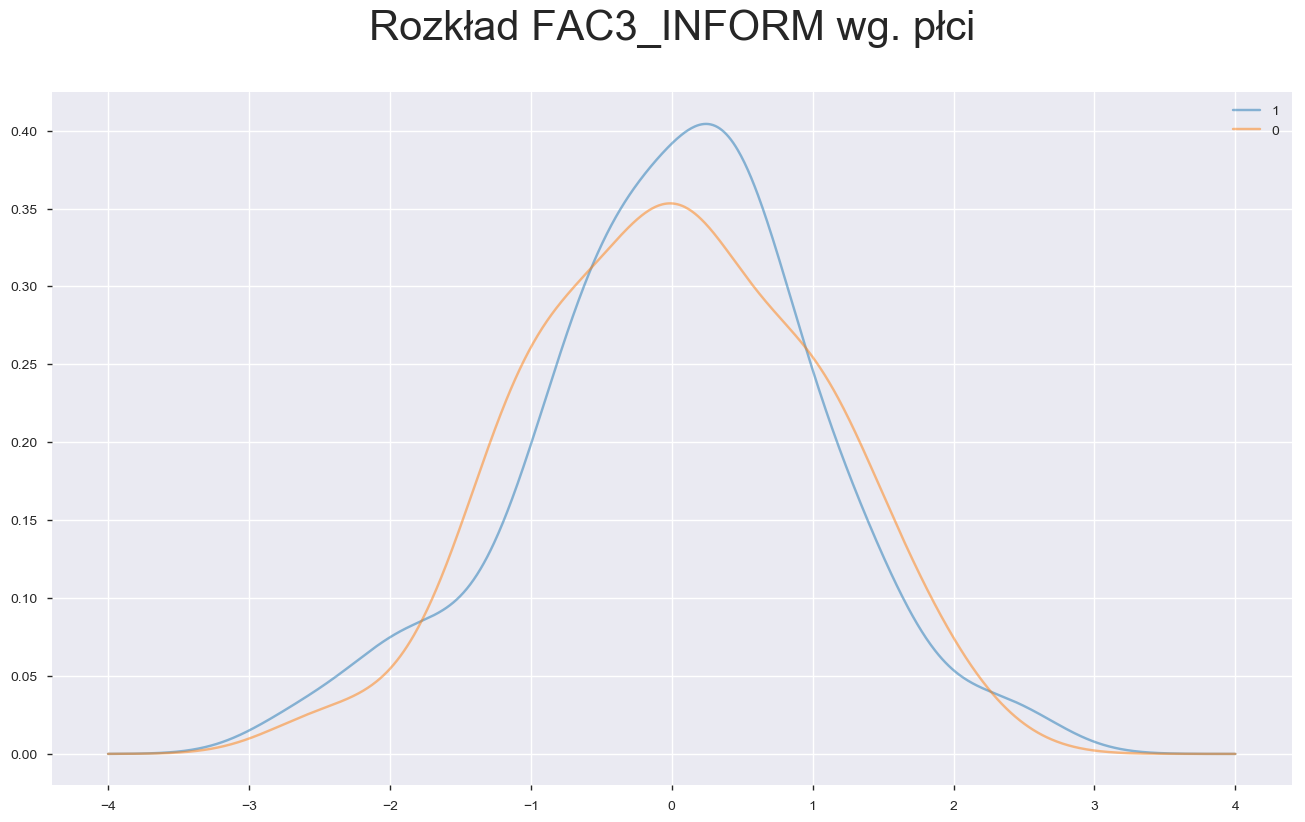

In [11]:
plot_factor_grouped_by_gender('FAC3_INFORM')

In [12]:
w = widgets.IntText()
display(w)

def on_change(change):
    clear_output(wait=True)
    display(w)
    display(loaded_images[emocje.loc[change['new'],'face_filename1_EMOCJE']])

w.observe(on_change,names='value')

IntText(value=0)

In [41]:
def plot_factor_grouped_by_age(factor_name):
    plt.figure(figsize=(16,9))
    x = np.linspace(-4,4,1000)
    
    q = np.quantile(zaufanie.wiek, [0,0.25,0.5,0.75,1])
    wiek = np.array(pd.cut(zaufanie.wiek, q, labels=np.arange(4)))
    #tmp = zaufanie
    #tmp.Wiek = wiek
    
    y1 = stats.gaussian_kde(zaufanie.loc[wiek==0,['ID',factor_name]].drop_duplicates().loc[:,factor_name])
    y2 = stats.gaussian_kde(zaufanie.loc[wiek==1,['ID',factor_name]].drop_duplicates().loc[:,factor_name])
    y3 = stats.gaussian_kde(zaufanie.loc[wiek==2,['ID',factor_name]].drop_duplicates().loc[:,factor_name])
    y4 = stats.gaussian_kde(zaufanie.loc[wiek==3,['ID',factor_name]].drop_duplicates().loc[:,factor_name])
    #y5 = stats.gaussian_kde(zaufanie.loc[wiek==4,['ID',factor_name]].drop_duplicates().loc[:,factor_name])
    plt.plot(x,y1(x),alpha=0.5)
    plt.plot(x,y2(x),alpha=0.5)
    plt.plot(x,y3(x),alpha=0.5)
    plt.plot(x,y4(x),alpha=0.5)
    plt.legend(['14-21','21-29','29-38','38-76'])
    plt.title(f'Rozkład {factor_name} wg. wieku\n', size = 30)
    plt.show()

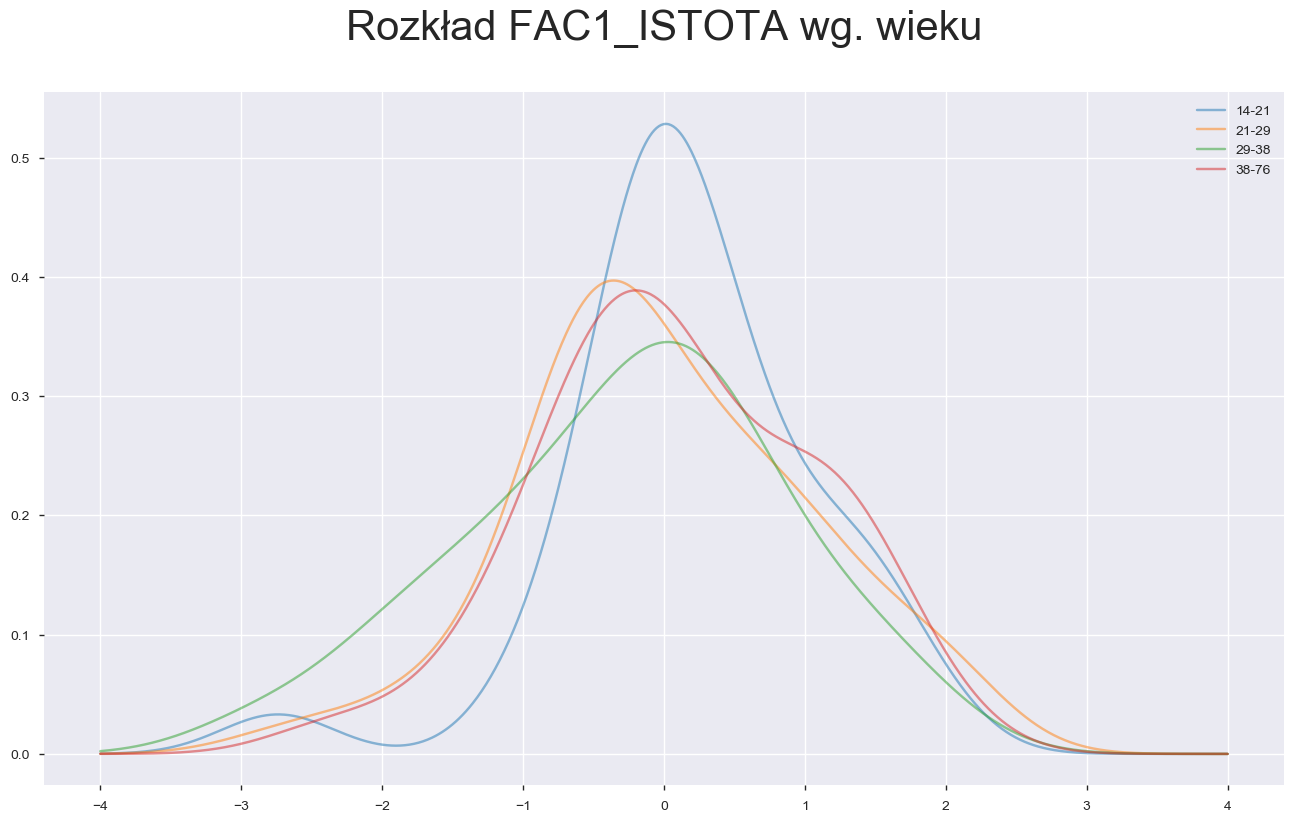

In [42]:
plot_factor_grouped_by_age('FAC1_ISTOTA')

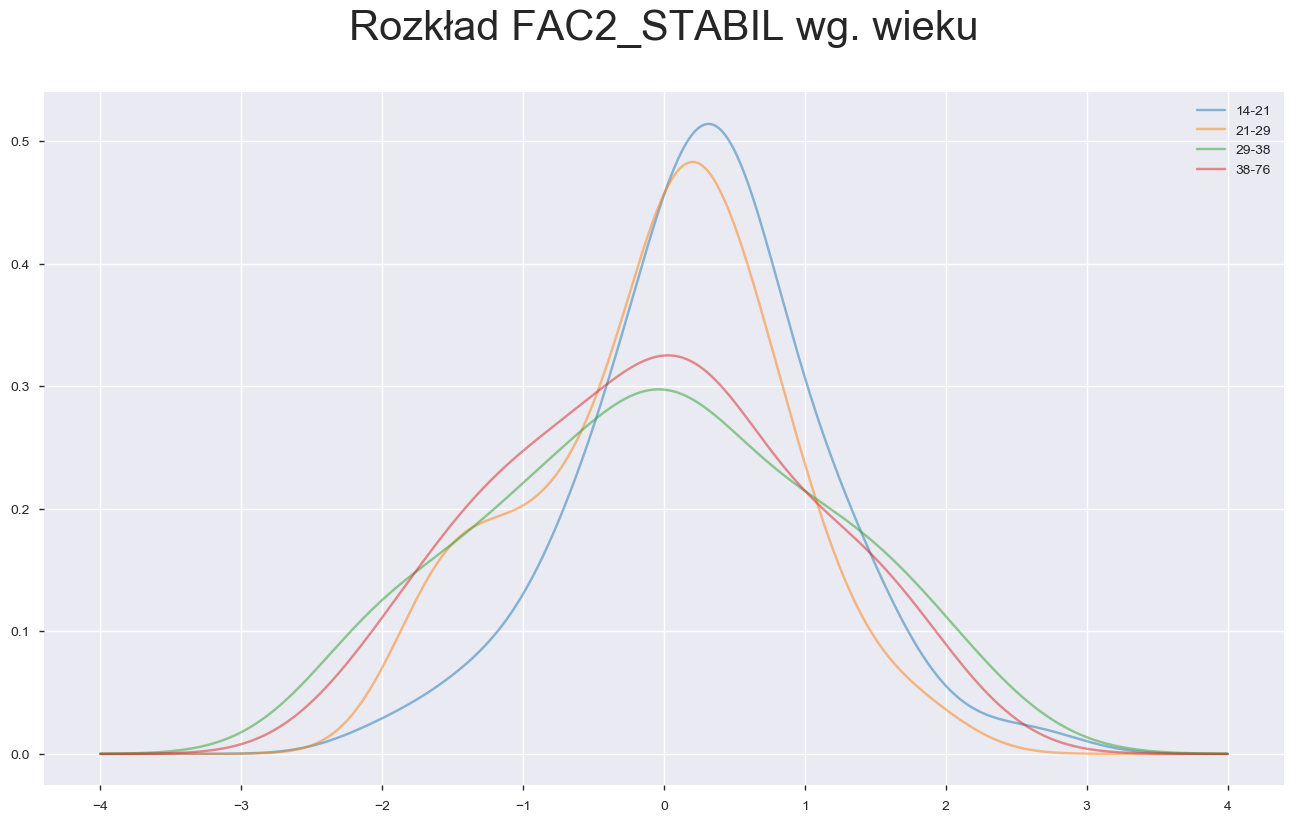

In [43]:
plot_factor_grouped_by_age('FAC2_STABIL')

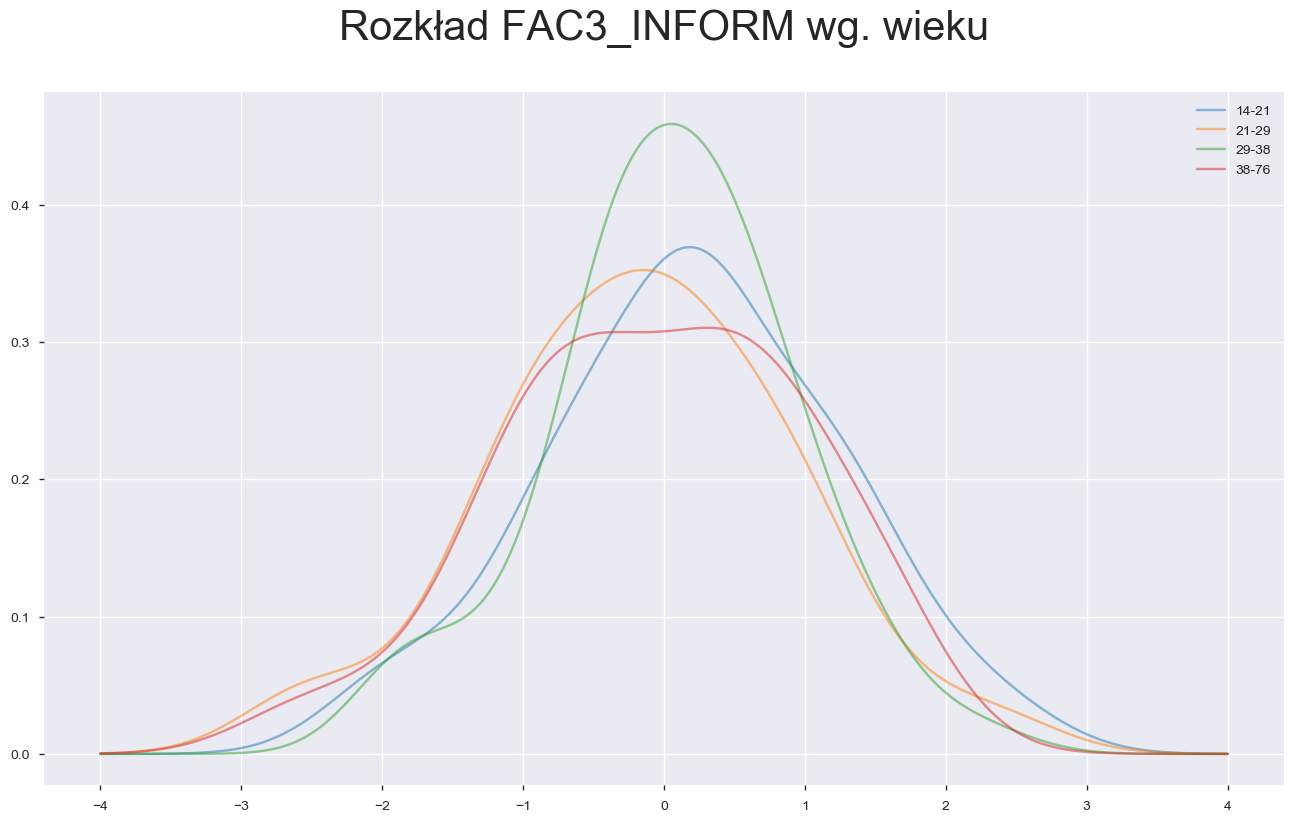

In [44]:
plot_factor_grouped_by_age('FAC3_INFORM')